#### __***TCAV Text***__

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [2]:
concept_texts = [
    "The match was thrilling and went into overtime.",
    "He scored the winning goal in the final seconds.",
    "The team celebrated their hard-fought victory."
]

random_texts = [
    "She made a delicious cake for her friend's birthday.",
    "I enjoy long walks in the evening.",
    "The weather today is sunny and warm."
]

sample_text = ["The football player scored a goal."]

### __***TF-IDF vectorization***__

In [3]:
texts = concept_texts + random_texts + sample_text
vec = TfidfVectorizer().fit(texts)

X_concept = vec.transform(concept_texts).toarray()
X_random = vec.transform(random_texts).toarray()
X_sample = vec.transform(sample_text).toarray()

X = np.vstack([X_concept, X_random])
y = np.array([1] * len(X_concept) + [0] * len(X_random))

cav = SGDClassifier().fit(X, y).coef_.reshape(-1)

In [4]:
dir_deriv = np.dot(X_sample, cav)[0]
print(f"Directional Derivative (Concept Influence): {dir_deriv:.4f}")

tcav_score = (np.dot(X_concept, cav) > 0).mean()
print(f"TCAV Score (Concept Alignment): {tcav_score:.2f}")

Directional Derivative (Concept Influence): 6.8805
TCAV Score (Concept Alignment): 1.00


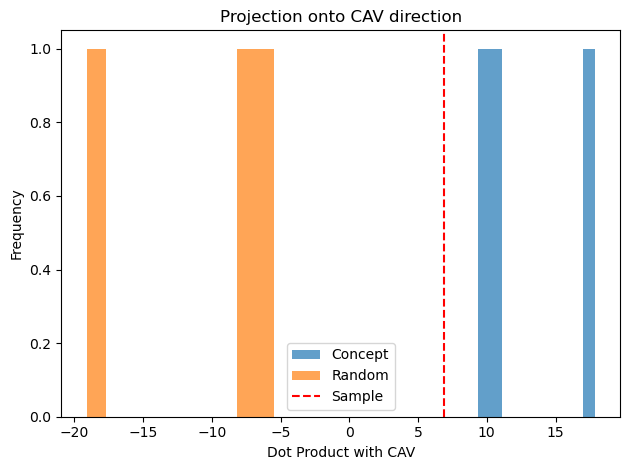

In [7]:
concept_proj = np.dot(X_concept, cav)
random_proj = np.dot(X_random, cav)
sample_proj = np.dot(X_sample, cav)

plt.hist(concept_proj, bins=10, alpha=0.7, label='Concept')
plt.hist(random_proj, bins=10, alpha=0.7, label='Random')
plt.axvline(sample_proj, color='red', linestyle='--', label='Sample')
plt.title("Projection onto CAV direction")
plt.xlabel("Dot Product with CAV")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()